In [1]:
import math
import os
import pathlib
import pickle
import sqlite3

from dotenv import load_dotenv

import numpy as np
import pandas as pd

# Neural network stuff
from darts import TimeSeries
from darts.utils.callbacks import TFMProgressBar
from darts.models import TCNModel, Prophet
# from fbprophet import Prophet
from darts.dataprocessing.transformers import Scaler
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.metrics import mape, r2_score, rmse, smape
from darts.utils.missing_values import fill_missing_values
from torch.nn import MSELoss

%load_ext dotenv
%dotenv

DATABASE_PATH = os.environ['DATABASE_PATH']
MODEL_STORE_PATH = os.environ['MODEL_STORE']

Python-dotenv could not parse statement starting at line 14


In [2]:
with sqlite3.connect(DATABASE_PATH) as conn:
    cur = conn.cursor()
    res = cur.execute("SELECT * FROM market_data where date >= '2022-09-01' order by ticker, date;")
    entries = res.fetchall()

full_dataset = pd.DataFrame(entries, columns=['ticker', 'date', 'open', 'high', 'low', 'close', 'volume', 'dividends', 'stock_splits'])
full_dataset['date'] = pd.to_datetime(full_dataset['date'])
full_dataset['avg_price'] = full_dataset[['open', 'high', 'low', 'close']].mean(axis=1)
full_dataset['paid_dividends'] = full_dataset['dividends'].replace(0, np.nan)
full_dataset['period'] = full_dataset.date.dt.to_period('Q')
sample = full_dataset.query("ticker == 'FIBRAPL14.MX'").get(['date', 'avg_price'])

In [3]:
ts = TimeSeries.from_dataframe(df=sample, time_col='date', value_cols='avg_price', freq='B')
ts = fill_missing_values(ts, fill='auto')

In [4]:
model = Prophet()
model.fit(ts)

13:44:44 - cmdstanpy - INFO - Chain [1] start processing
13:44:45 - cmdstanpy - INFO - Chain [1] done processing


Prophet(add_seasonalities=None, country_holidays=None, suppress_stdout_stderror=True, add_encoders=None, cap=None, floor=None)

In [23]:
prediction = model.predict(n=100)

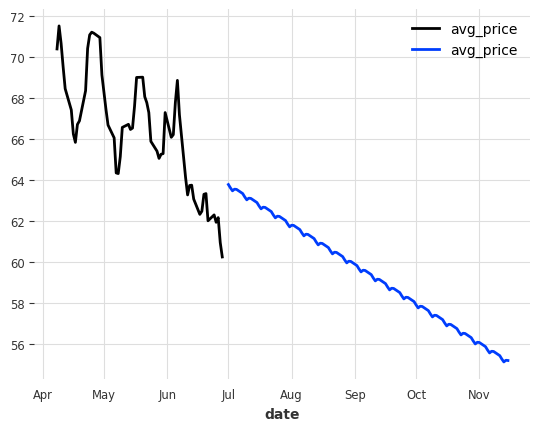

In [24]:
ts[-60:].plot()
prediction.plot();

In [7]:
model.backtest(ts)

13:45:40 - cmdstanpy - INFO - Chain [1] start processing
13:45:42 - cmdstanpy - INFO - Chain [1] done processing
13:45:43 - cmdstanpy - INFO - Chain [1] start processing
13:45:47 - cmdstanpy - INFO - Chain [1] done processing
13:45:47 - cmdstanpy - INFO - Chain [1] start processing
13:45:55 - cmdstanpy - INFO - Chain [1] done processing
13:45:55 - cmdstanpy - INFO - Chain [1] start processing
13:45:55 - cmdstanpy - INFO - Chain [1] done processing
13:45:55 - cmdstanpy - INFO - Chain [1] start processing
13:45:55 - cmdstanpy - INFO - Chain [1] done processing
13:45:56 - cmdstanpy - INFO - Chain [1] start processing
13:45:56 - cmdstanpy - INFO - Chain [1] done processing
13:45:56 - cmdstanpy - INFO - Chain [1] start processing
13:45:56 - cmdstanpy - INFO - Chain [1] done processing
13:45:56 - cmdstanpy - INFO - Chain [1] start processing
13:45:57 - cmdstanpy - INFO - Chain [1] done processing
13:45:57 - cmdstanpy - INFO - Chain [1] start processing
13:45:57 - cmdstanpy - INFO - Chain [1]

3.3143277673795004

In [10]:
model.historical_forecasts(ts)

13:50:06 - cmdstanpy - INFO - Chain [1] start processing
13:50:08 - cmdstanpy - INFO - Chain [1] done processing
13:50:08 - cmdstanpy - INFO - Chain [1] start processing
13:50:13 - cmdstanpy - INFO - Chain [1] done processing
13:50:14 - cmdstanpy - INFO - Chain [1] start processing
13:50:24 - cmdstanpy - INFO - Chain [1] done processing
13:50:24 - cmdstanpy - INFO - Chain [1] start processing
13:50:24 - cmdstanpy - INFO - Chain [1] done processing
13:50:24 - cmdstanpy - INFO - Chain [1] start processing
13:50:25 - cmdstanpy - INFO - Chain [1] done processing
13:50:25 - cmdstanpy - INFO - Chain [1] start processing
13:50:25 - cmdstanpy - INFO - Chain [1] done processing
13:50:26 - cmdstanpy - INFO - Chain [1] start processing
13:50:26 - cmdstanpy - INFO - Chain [1] done processing
13:50:26 - cmdstanpy - INFO - Chain [1] start processing
13:50:26 - cmdstanpy - INFO - Chain [1] done processing
13:50:27 - cmdstanpy - INFO - Chain [1] start processing
13:50:27 - cmdstanpy - INFO - Chain [1]

<TimeSeries (DataArray) (time: 474, component: 1, sample: 1)> Size: 4kB
array([[[47.76421213]],

       [[47.87767768]],

       [[45.45204589]],

       [[45.88080117]],

       [[46.52565899]],

       [[47.7039151 ]],

       [[47.78580255]],

       [[47.42145612]],

       [[48.40681453]],

       [[50.24535392]],

...

       [[65.38429754]],

       [[65.30336127]],

       [[65.02824127]],

       [[65.12247797]],

       [[65.02589658]],

       [[64.73997671]],

       [[64.46156788]],

       [[64.21339539]],

       [[64.25544334]],

       [[64.17541315]]])
Coordinates:
  * time       (time) datetime64[ns] 4kB 2022-09-06 2022-09-07 ... 2024-06-28
  * component  (component) object 8B 'avg_price'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None